In [535]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.stats import sem
from math import trunc

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load) 

# Combine the data into a single dataset
combined_df=pd.merge(mouse_drug_df,clinical_trial_df,how="outer",on="Mouse ID")

# Display the data table for preview
combined_df.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [536]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_volume = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_volume_df = mean_volume.to_frame(name = 'Mean Tumor Volume (mm3)').reset_index()

# Preview DataFrame
mean_volume_df.head(10)

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [537]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_volume = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_volume_df = sem_volume.to_frame(name = 'Standard Error of Tumor Volume (mm3)').reset_index()

# Preview DataFrame
sem_volume_df.head(10)


,Drug,Timepoint,Standard Error of Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [538]:
# Minor Data Munging to Re-Format the Data Frames
reformat_volume = combined_df[['Timepoint', 'Drug', 'Tumor Volume (mm3)']]
new_mean_volume_df = reformat_volume.pivot_table(
                                       index='Timepoint',
                                       columns='Drug',
                                       values='Tumor Volume (mm3)',
                                       aggfunc=np.mean
                                      )

new_sem_volume_df = reformat_volume.pivot_table(
                                       index='Timepoint',
                                       columns='Drug',
                                       values='Tumor Volume (mm3)',
                                       aggfunc=sem
                                      )

# Preview that Reformatting worked
new_mean_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [539]:
new_volume = new_mean_volume_df.mean()
new_volume

Drug
Capomulin    40.485084
Ceftamin     53.752434
Infubinol    54.963549
Ketapril     56.806906
Naftisol     55.891024
Placebo      56.012209
Propriva     54.911934
Ramicane     39.986931
Stelasyn     55.981636
Zoniferol    54.660451
dtype: float64

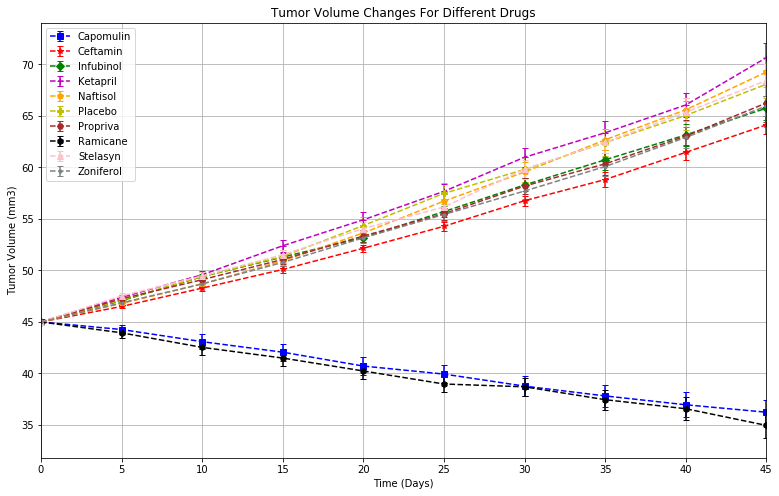

In [540]:
# Generate the Plot (with Error Bars)
# a = ["Capomulin", "Infubinol", "Ketapril", "Placebo",]
a = new_mean_volume_df.keys()
reset_volume = new_mean_volume_df.reset_index()
color = ["b","r","g","m","orange","y","brown","black","pink","grey"]
markers = ["s","*","D","+","p","P","H","h","^","."]
x_axis = reset_tumor_volume["Timepoint"]

plt.figure(figsize=(13,8))
for i in range(len(a)):
    plt.errorbar(
        x_axis, reset_tumor_volume[a[i]],
        yerr=new_sem_tumor_volume_df[a[i]],
        markersize = 6, label=a[i],
        fmt = markers[i], color = color[i],
        ls= "--",capsize=3,capthick=1
                )

plt.grid(True)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")    
plt.xlim(0,x_axis.max())
plt.legend(loc="best")  
plt.title("Tumor Volume Changes For Different Drugs")

# Save the Figure
plt.savefig("Images/Tumor_volume_changes.png")

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [541]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metastatic_df = mean_metastatic.to_frame(name = 'Metastatic Sites')#.reset_index()

# Preview DataFrame
mean_metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [542]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
sem_metastatic_df = sem_metastatic.to_frame(name = 'Metastatic Sites')

# Preview DataFrame
sem_metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [543]:
# Minor Data Munging to Re-Format the Data Frames
reformat_metastatic = combined_df[['Timepoint', 'Drug', 'Metastatic Sites']]
mean_meta_volume_df = reformat_metastatic.pivot_table(
                                       index='Timepoint',
                                       columns='Drug',
                                       values='Metastatic Sites',
                                       aggfunc='mean'
                                      )

sem_meta_volume_df = reformat_metastatic.pivot_table(
                                       index='Timepoint',
                                       columns='Drug',
                                       values='Metastatic Sites',
                                       aggfunc='sem'
                                      )


# Preview that Reformatting worked
mean_meta_volume_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


<function matplotlib.pyplot.show(*args, **kw)>

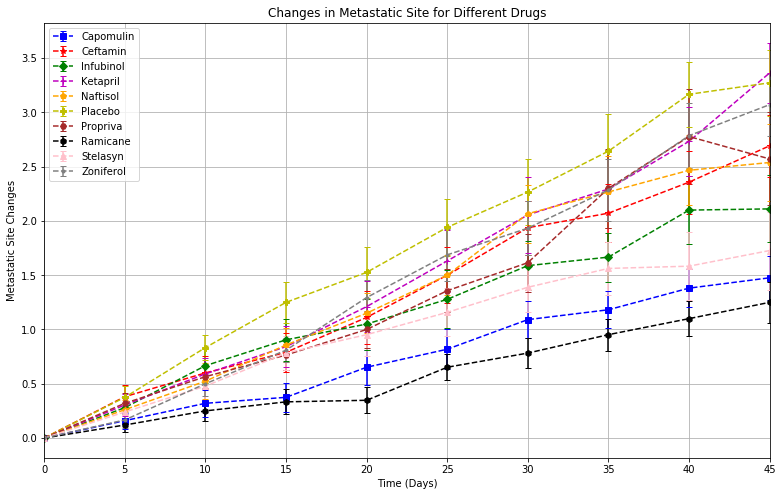

In [545]:
# Generate the Plot (with Error Bars)
# Generate the Plot (with Error Bars)
a = mean_meta_volume_df.keys()
color = ["b","r","g","m","orange","y","brown","black","pink","grey"]
markers = ["s","*","D","+","p","P","H","h","^","."]
x_axis = reset_tumor_volume["Timepoint"]
plt.figure(figsize=(13,8))

for i in range(len(a)):
    plt.errorbar(
        x_axis, reset_metastatic[a[i]],
        yerr=sem_meta_volume_df[a[i]],
        markersize = 6, label=a[i],
        fmt = markers[i], color = color[i],
        ls= "--",capsize=3,capthick=1
                )

plt.grid(True)
plt.ylabel("Metastatic Site Changes")
plt.xlabel("Time (Days)")    
plt.xlim(0,x_axis.max())
plt.legend(loc="best")  
plt.title("Changes in Metastatic Site for Different Drugs")

# Save the Figure
plt.savefig("Images/Metastatic_sites_changes.png")

# Show the Figure
plt.show

## Survival Rates

In [546]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].count()

# Convert to DataFrame
mice_count_df = mice_count.to_frame(name = 'Metastatic Sites')

# Preview DataFrame
mice_count_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                        25
          5                        25
          10                       25
          15                       24
          20                       23

In [547]:
# Minor Data Munging to Re-Format the Data Frames
new_mice_count = re_format_metastatic.pivot_table(
                                       index='Timepoint',
                                       columns='Drug',
                                       values='Metastatic Sites',
                                       aggfunc='count'
                                      )

# Preview the Data Frame
new_mice_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


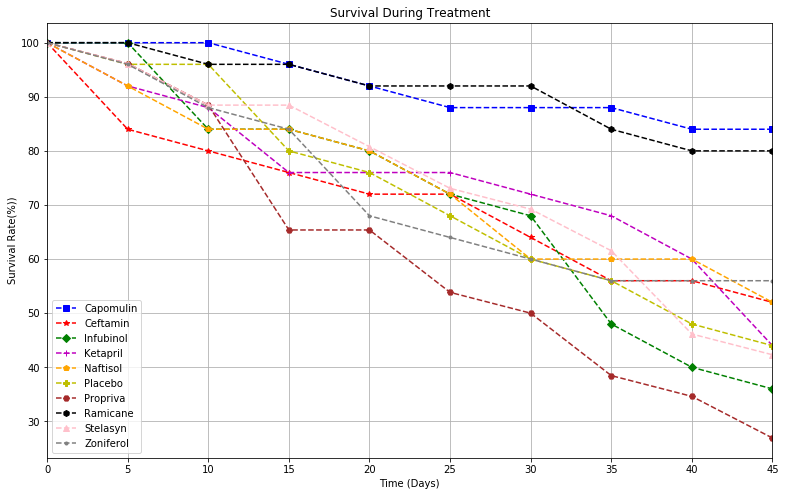

In [549]:
# Calculate the percent changes for each drug
survival_percentage = new_mice_count.copy()
survival_percentage = round(
                            survival_percentage.apply(
                                lambda c: c / c.max() * 100, axis=0
                            )
    ,2)

# Generate the Plot (Accounting for percentages
a = survival_percentage.keys()
color = ["b","r","g","m","orange","y","brown","black","pink","grey"]
markers = ["s","*","D","+","p","P","H","h","^","."]
x_axis = reset_tumor_volume["Timepoint"]
plt.figure(figsize=(13,8))

for i in range(len(a)):
    plt.plot(
        x_axis, survival_percentage[a[i]],
        markersize = 6, label=a[i],
        marker = markers[i], color = color[i],
        ls= "--"
                )

plt.grid(True)
plt.ylabel("Survival Rate(%))")
plt.xlabel("Time (Days)")    
plt.xlim(0,x_axis.max())
plt.legend(loc="best")  
plt.title("Survival During Treatment")

# Save the Figure
plt.savefig("Images/Survival_Rate_During_Treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [550]:

reformat_volume = combined_df[['Timepoint', 'Drug', 'Tumor Volume (mm3)']]
new_mean_volume_df = reformat_volume.pivot_table(index='Drug',
                                       columns='Timepoint',
                                       values='Tumor Volume (mm3)',
                                       aggfunc='mean'
                                      )

percentchange = ( (
        new_mean_volume_df[45] - new_mean_volume_df[0])/(new_mean_volume_df[0]
                                                    )*100)
percentchange= percentchange.to_frame("% Change")
percent_change


# Display the data to confirm


,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


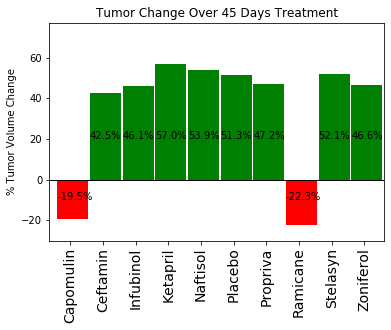

In [605]:
# Get a list of the drugs
test_drugs = []
for i in a:
    test_drugs.append(i)

# Orient widths, tick marks, etc    
x_axis = np.arange(percent_change["% Change"].count())
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
plt.xticks(tick_locations, test_drugs, rotation=90, fontsize=14)

# Splice the data between passing and failing drugs
colors= []
colors = ["green" if item >= 0 else "red" for item in percent_change["% Change"]]
        
#Plot the data, add labels, limits
summary_bar = plt.subplot()
percentchange = summary_bar
percentchange.bar(x_axis, percent_change["% Change"], color=colors, align="edge", width=0.95)
plt.title("Tumor Change Over 45 Days Treatment")
plt.axhline(linewidth=1, color='black', y=0)
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(test_drugs))
plt.ylim(-30, max(percent_change["% Change"]) + 20)
plt.xticks(fontsize=14)

#loop through values in the y list to determine where label is placed
count = 0
list = []
for y in percent_change["% Change"]:
    list.append(y)
for x in percent_change["% Change"]:
    if x < 0:
        ybar = -10
    else:
        ybar = 20
    index=x_axis[count]
    plt.text(count, ybar, str(round(x,1)) + "%", ha='left', color='black')
    count += 1
    
# Save the Figure    
plt.savefig("Images/Tumor_change_over_45_days.png")

# Show the Figure
plt.show()